In [1]:
#Import the necessary libraries: pandas, matplotlib and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Upload the csv file
penguins = sns.load_dataset("penguins")

In [3]:
#Visualize the first 5 rows
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
#Explore the dataset
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
#Describe() method provides a summary of statistics pertaining to the DataFrame numeric columns
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
#Count the number of missing (NaN) values in each column
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
# Fill null values ​​in numeric columns with mean
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in num_cols:
    penguins[col].fillna(penguins[col].mean(), inplace=True)

# Fill null values ​​in categorical columns with mode
cat_cols = ['sex']
for col in cat_cols:
    penguins[col].fillna(penguins[col].mode()[0], inplace=True)

In [8]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [10]:
#Visualize some graphs

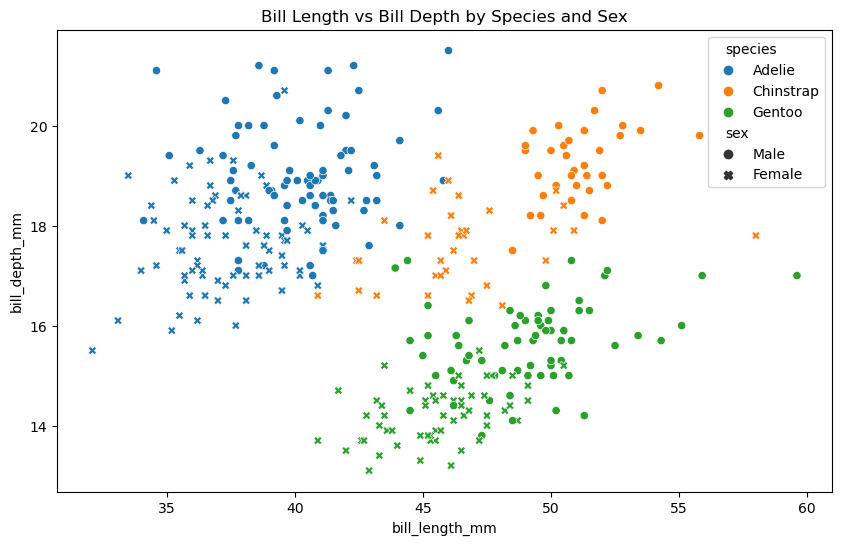

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', style='sex')
plt.title("Bill Length vs Bill Depth by Species and Sex")
plt.show()

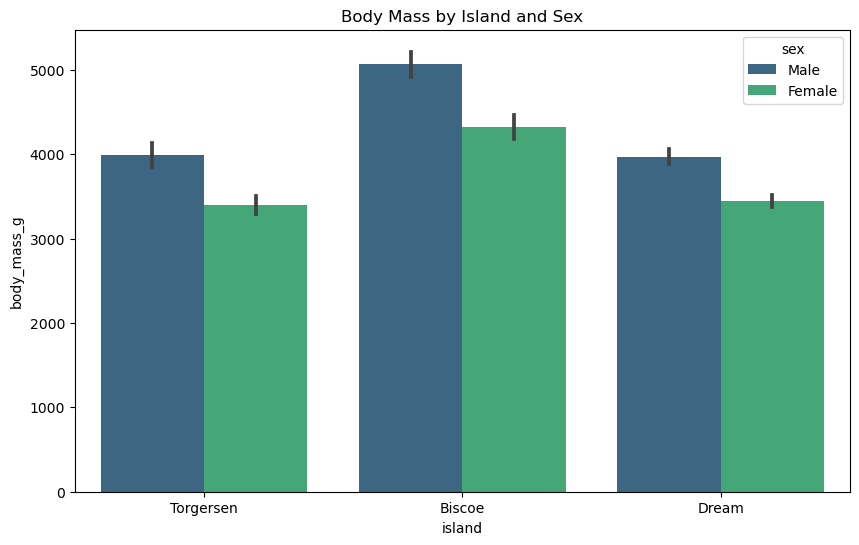

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=penguins, x='island', y='body_mass_g', hue='sex', palette='viridis')
plt.title('Body Mass by Island and Sex')
plt.show()

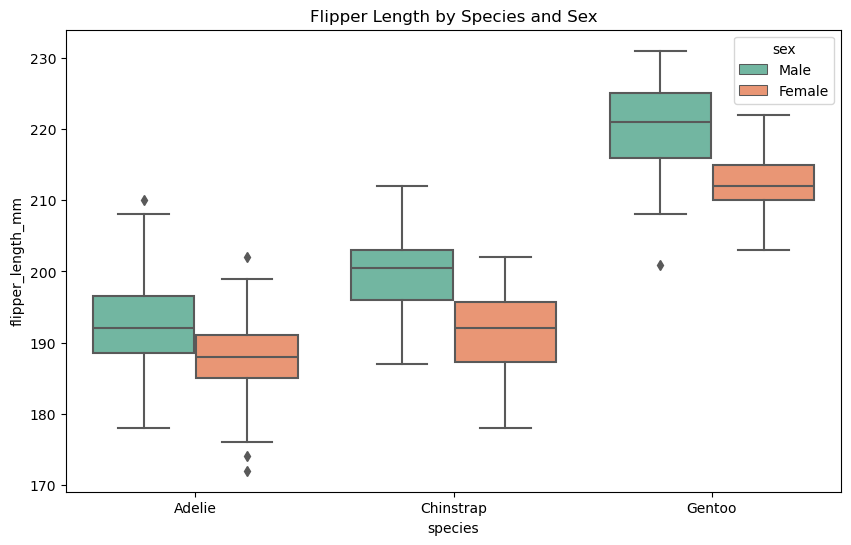

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=penguins, x='species', y='flipper_length_mm', hue='sex', palette='Set2')
plt.title('Flipper Length by Species and Sex')
plt.show()

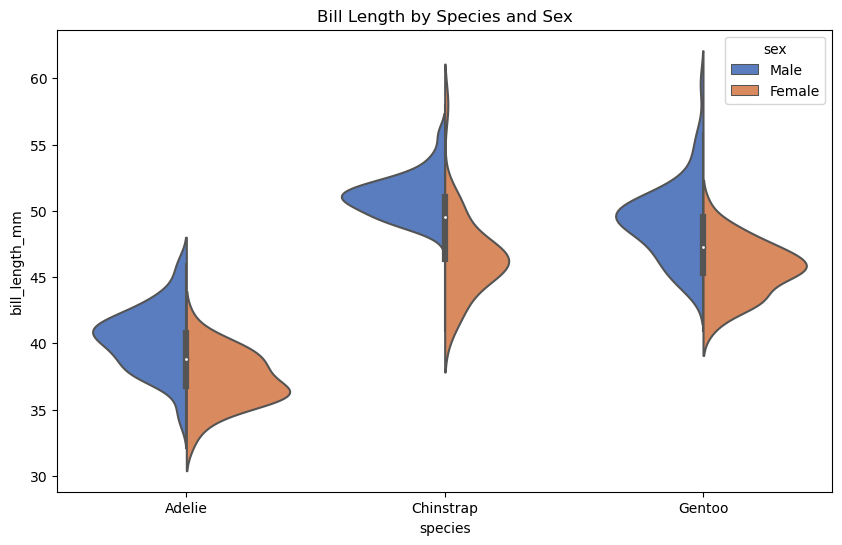

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=penguins, x='species', y='bill_length_mm', hue='sex', split=True, palette='muted')
plt.title('Bill Length by Species and Sex')
plt.show()

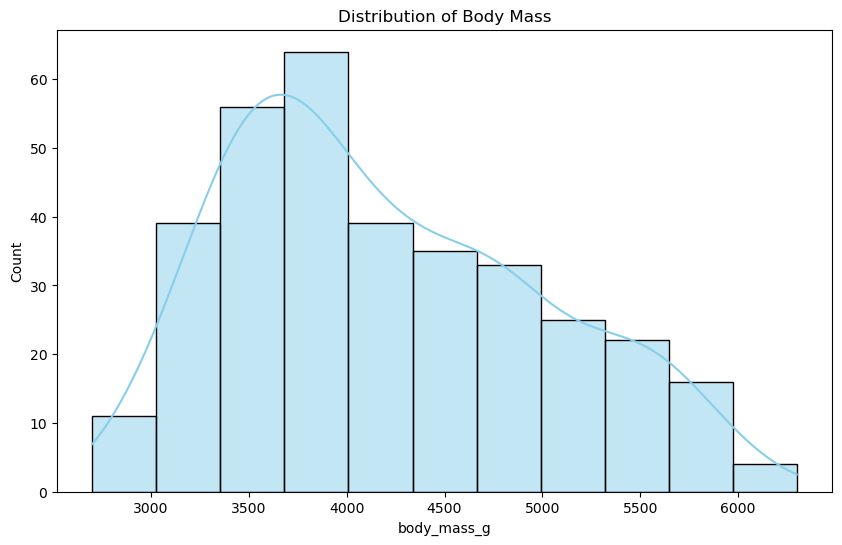

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=penguins, x='body_mass_g', kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Body Mass')
plt.show()

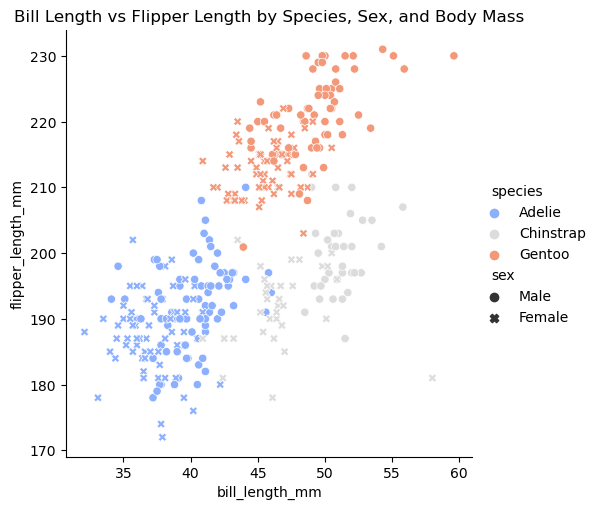

In [16]:
sns.relplot(data=penguins, x='bill_length_mm', y='flipper_length_mm', hue='species', style='sex', palette='coolwarm')
plt.title('Bill Length vs Flipper Length by Species, Sex, and Body Mass')
plt.show()

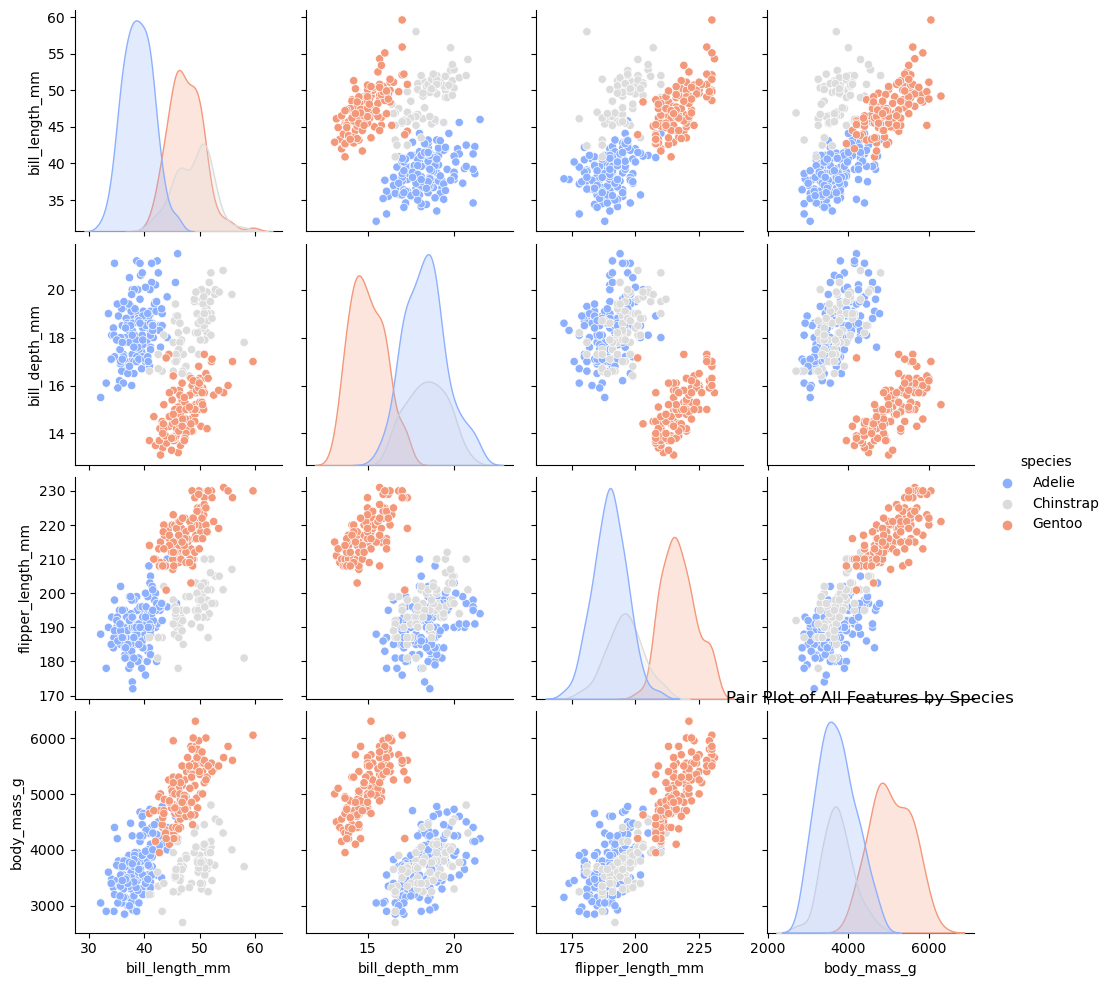

In [17]:
sns.pairplot(penguins, hue='species', palette='coolwarm')
plt.title('Pair Plot of All Features by Species')
plt.show()

In [18]:
#Model to predict the species

In [19]:
#Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [20]:
# Convert categorical values to numerical values for 'sex' and 'island' columns
penguins['sex'] = penguins['sex'].map({'Female': 0, 'Male': 1})
penguins['island'] = penguins['island'].map({'Torgersen': 0, 'Biscoe': 1, 'Dream': 2})

In [21]:
# Separate the features (X) by dropping the 'species' column
X = penguins.drop('species', axis=1)

# Set the target variable (y) as the 'species' column
y = penguins['species']


In [22]:
# Split the dataset into training and testing sets with 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Initialize the RandomForestClassifier with 100 trees and a fixed random state for reproducibility
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
# Predict the target values for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print(f'Accuracy: {accuracy}')

# Print the classification report for detailed performance metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.9855072463768116
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        32
   Chinstrap       1.00      1.00      1.00        16
      Gentoo       0.95      1.00      0.98        21

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69



In [25]:
# Compute the confusion matrix to evaluate the accuracy of the classification
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[31  0  1]
 [ 0 16  0]
 [ 0  0 21]]


In [26]:
nuevos_datos = {
    'island': [0, 1, 2],
    'bill_length_mm': [50.0, 45.0, 35.0],
    'bill_depth_mm': [15.0, 17.0, 20.0],
    'flipper_length_mm': [200.0, 190.0, 180.0],
    'body_mass_g': [5000.0, 4500.0, 4000.0],
    'sex': [0, 1, 0]
}

# Convert the new data to a pandas DataFrame
nuevos_datos_df = pd.DataFrame(nuevos_datos)

# Make predictions with the new data
predicciones = model.predict(nuevos_datos_df)

# Add the predictions to the new data DataFrame
nuevos_datos_df['predicted_species'] = predicciones

print(nuevos_datos_df)



   island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex  \
0       0            50.0           15.0              200.0       5000.0    0   
1       1            45.0           17.0              190.0       4500.0    1   
2       2            35.0           20.0              180.0       4000.0    0   

  predicted_species  
0            Gentoo  
1            Adelie  
2            Adelie  
